[2022-11-05 11:35:24.612975] INFO: system_log: H5TicksLoader initiated: C:\Users\EGBT\.rqalpha-plus\bundle\ticks


[2015-02-06 15:00:00.000000] WARN: user_system_log: 订单创建失败: 600401.XSHG 在 2015-02-06 时停牌
[2015-02-13 15:00:00.000000] WARN: user_system_log: 订单创建失败: 600401.XSHG 在 2015-02-13 时停牌
[2015-04-10 15:00:00.000000] WARN: user_system_log: 订单创建失败: 601519.XSHG 在 2015-04-10 时停牌
[2015-04-17 15:00:00.000000] WARN: user_system_log: 订单创建失败: 601519.XSHG 在 2015-04-17 时停牌
[2015-07-10 15:00:00.000000] WARN: user_system_log: 订单创建失败: 600488.XSHG 在 2015-07-10 时停牌
[2015-07-10 15:00:00.000000] WARN: user_system_log: 订单创建失败: 002118.XSHE 在 2015-07-10 时停牌
[2016-09-23 15:00:00.000000] WARN: user_system_log: 订单创建失败: 300088.XSHE 在 2016-09-23 时停牌
[2016-09-30 15:00:00.000000] WARN: user_system_log: 订单创建失败: 300088.XSHE 在 2016-09-30 时停牌
[2016-10-14 15:00:00.000000] WARN: user_system_log: 订单创建失败: 300088.XSHE 在 2016-10-14 时停牌
[2016-10-21 15:00:00.000000] WARN: user_system_log: 订单创建失败: 300088.XSHE 在 2016-10-21 时停牌
[2016-10-28 15:00:00.000000] WARN: user_system_log: 订单创建失败: 300088.XSHE 在 2016-10-28 时停牌
[2016-11-04 15:00:00.

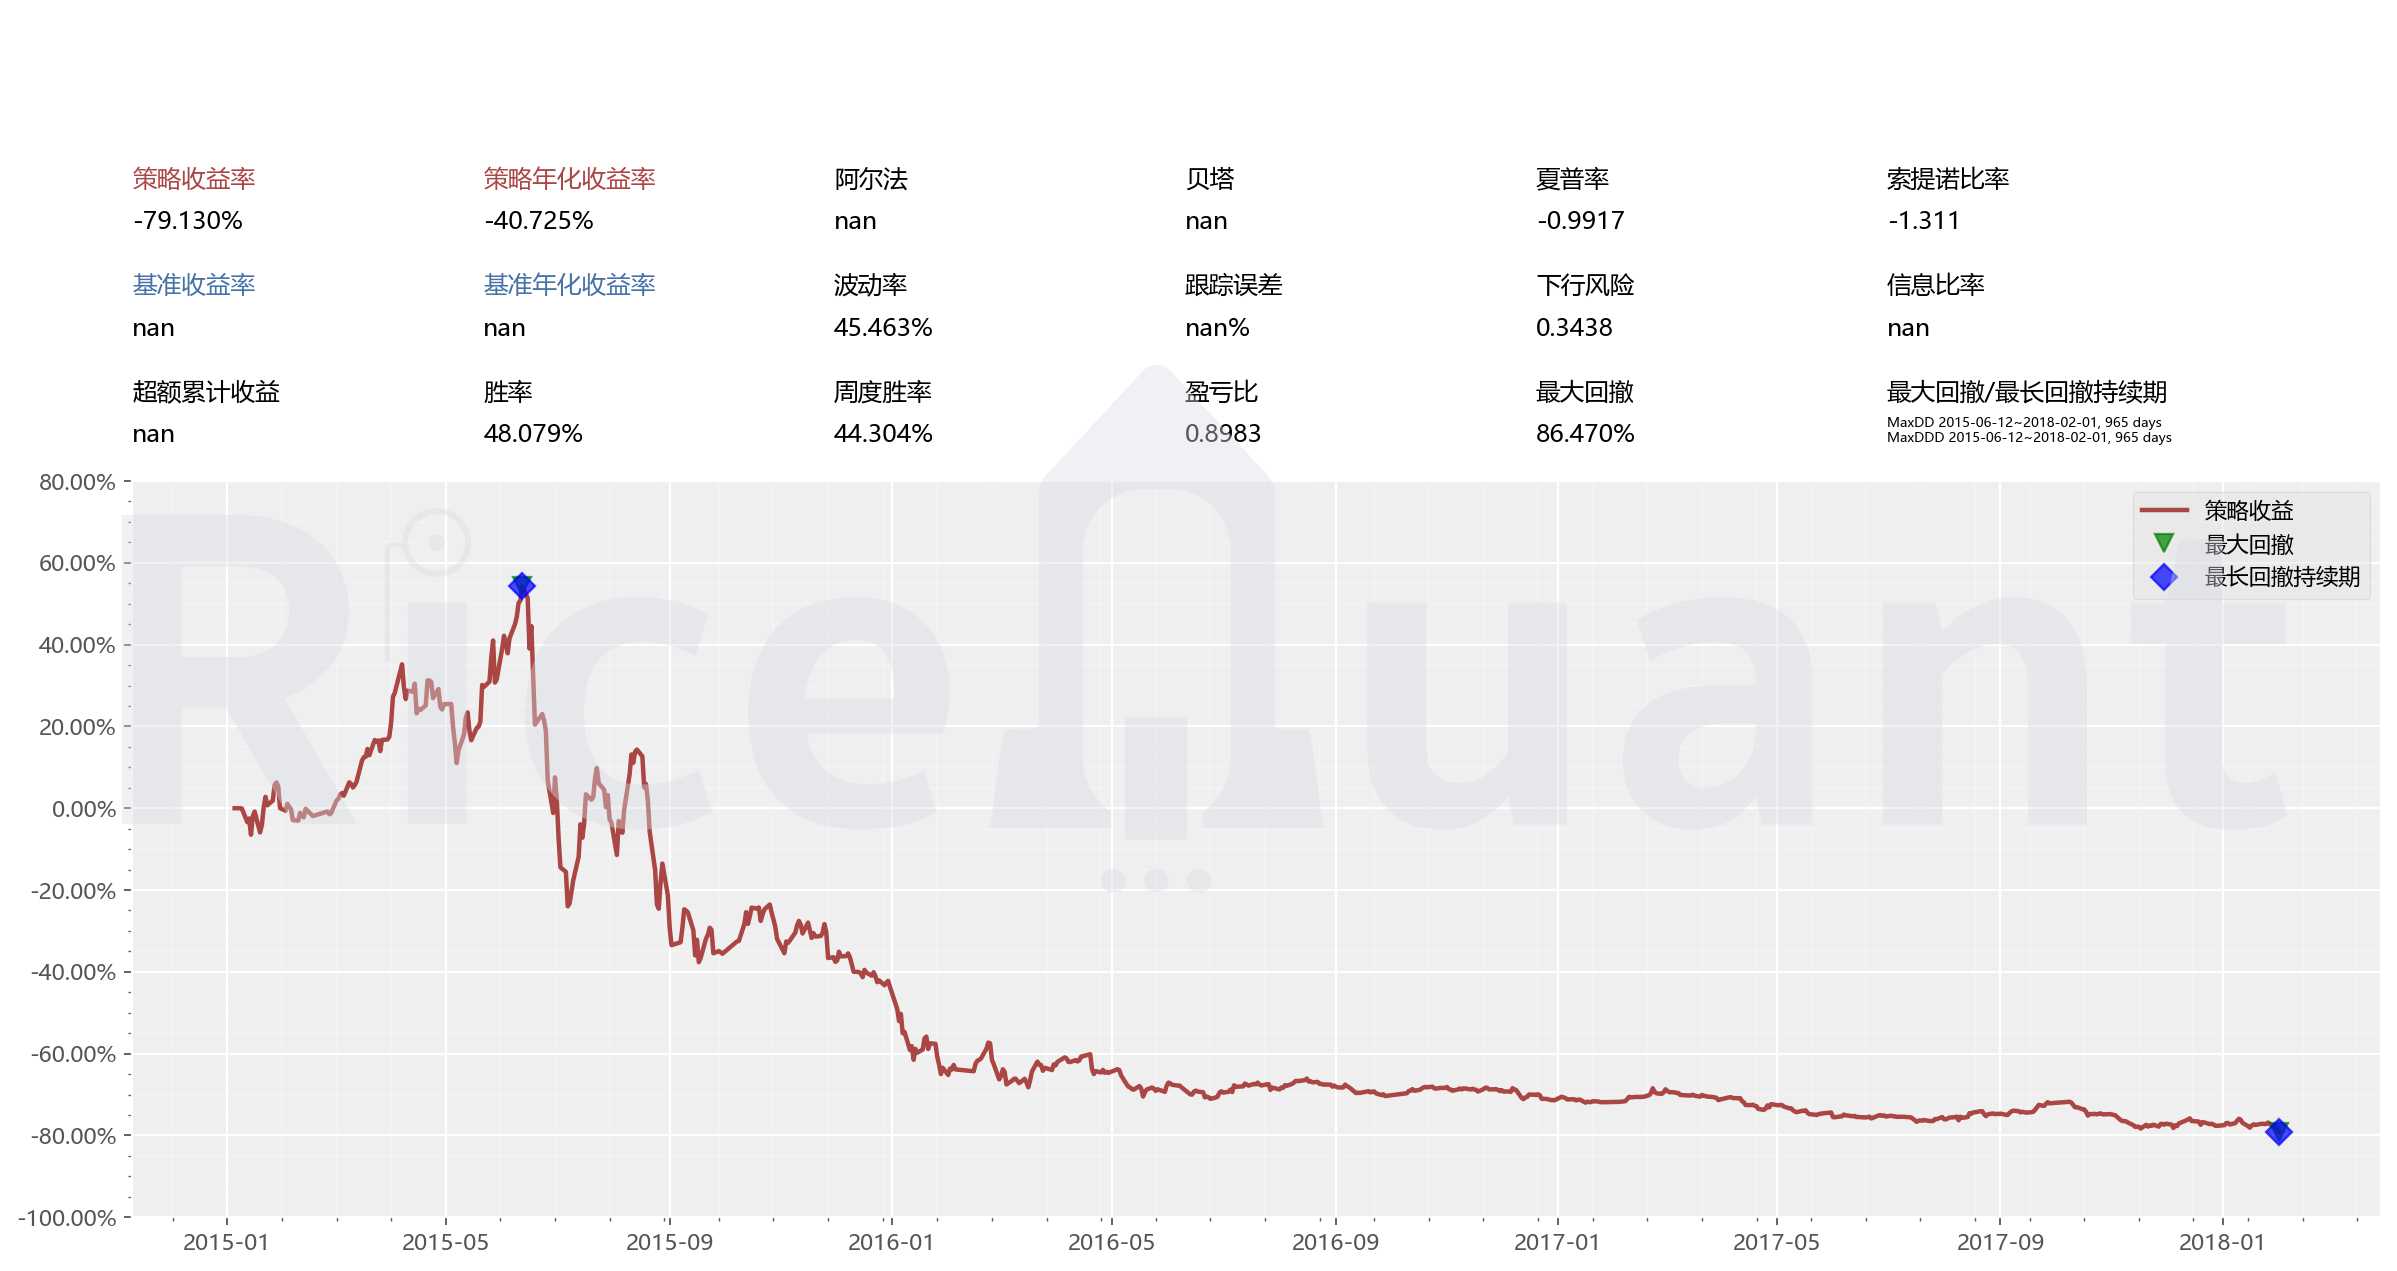

In [3]:
from rqalpha_plus.apis import *
from rqalpha_plus import run_func
import pandas as pd
import talib

config = {
      "base": {
                "start_date": "2015-01-01",
                "end_date": "2018-02-01",
                "frequency": '1d',
                "accounts": {
                                "stock": 1000000
                            }
              },
  "mod": {
            "sys_progress": {
                "enabled": True,
                "show": True,
            },
    "sys_analyser": {
        "enabled": True,
        "plot": True,
        "report_save_path": None,
    },
    "sys_simulation": {
                        "matching_type": "current_bar",
                        "price_limit": False,
                        "volume_limit": False,
                        }
  }
}

def init(context):
    context.OBSERVATION = 5
    scheduler.run_weekly(RotationAdj, weekday = 5)

def TpROC(context, bar_dict):
    context.s = index_components('000905.XSHG')
    rst = pd.DataFrame(columns=('Symbol', 'ROC'))
    for stock in context.s:
        if not bar_dict[stock].suspended and bar_dict[stock].close != bar_dict[stock].limit_down:
            GetSymbol_ClosePrice = history_bars(stock, context.OBSERVATION + 1, '1d', 'close')
            CurReturn = talib.ROC(GetSymbol_ClosePrice, context.OBSERVATION)
            rst = rst.append([{'Symbol':stock, 'ROC':CurReturn[5]}])
        else:
            rst = rst.append([{'Symbol':stock, 'ROC':0}])
    # print(rst.sort_values('ROC'))
    rst = rst.sort_values('ROC').head(3)
    # print(rst)
    return rst

def CkH(context):
    positions = context.portfolio.stock_account.positions
    B_Basket = []
    for position in positions:
        if positions[position].quantity > 0:
            B_Basket.append(position)
    
    return B_Basket

def buy_stocks(buying, context, bar_dict):
    trading_stocks = []
    for stock in buying:
        if bar_dict[stock].suspended == False:
            trading_stocks.append(stock)

    return trading_stocks

def RotationAdj(context, bar_dict):
    Limit = 0
    TopStock = set(TpROC(context, bar_dict)['Symbol'].tolist())
    Ck_H = set(CkH(context))

    Buying = TopStock - Ck_H
    Selling = Ck_H - TopStock
    BuyLimit = len(Buying)

    for stock in Selling:
        qtys = context.portfolio.stock_account.positions[stock].quantity
        order_shares(stock, -qtys)

    cash = context.portfolio.cash

    cash_average =  cash / len(Buying)

    for stock in Buying:
        if Limit < BuyLimit:
            order_target_value(stock, cash_average)
            Limit = Limit + 1

def handle_bar(context, bar_dict):
    pass

results = run_func(init=init, config=config, handle_bar=handle_bar)

In [ ]:
from rqalpha_plus.apis import *
from rqalpha_plus import run_func
import pandas as pd
import talib

config = {
      "base": {
                "start_date": "2015-01-01",
                "end_date": "2018-02-01",
                "frequency": '1d',
                "accounts": {
                                "stock": 1000000
                            }
              },
  "mod": {
            "sys_progress": {
                "enabled": True,
                "show": True,
            },
    "sys_analyser": {
        "enabled": True,
        "plot": True,
        "report_save_path": None,
    },
    "sys_simulation": {
                        "matching_type": "current_bar",
                        "price_limit": False,
                        "volume_limit": False,
                        }
  }
}

def init(context):
    context.OBSERVATION = 5
    scheduler.run_weekly(RotationAdj, weekday = 5)

def TpROC(context, bar_dict):
    context.s = index_components('000905.XSHG')
    rst = pd.DataFrame(columns=('Symbol', 'ROE'))
    for stock in context.s:
        if not bar_dict[stock].suspended and bar_dict[stock].close != bar_dict[stock].limit_down:
            GetSymbol_ClosePrice = history_bars(stock, context.OBSERVATION + 1, '1d', 'close')
            CurReturn = talib.ROC(GetSymbol_ClosePrice, context.OBSERVATION)
            rst = rst.append([{'Symbol':stock, 'ROE':CurReturn[5]}])
        else:
            rst = rst.append([{'Symbol':stock, 'ROE':0}])
    rst = rst.sort_values('ROC', ascending=False).head(3)
    return rst

def CkH(context):
    positions = context.portfolio.stock_account.positions
    B_Basket = []
    for position in positions:
        if positions[position].quantity > 0:
            B_Basket.append(position)
    
    return B_Basket

def buy_stocks(buying, context, bar_dict):
    trading_stocks = []
    for stock in buying:
        if bar_dict[stock].suspended == False:
            trading_stocks.append(stock)

    return trading_stocks

def RotationAdj(context, bar_dict):
    Limit = 0
    TopStock = set(TpROC(context, bar_dict)['Symbol'].tolist())
    Ck_H = set(CkH(context))

    Buying = TopStock - Ck_H
    Selling = Ck_H - TopStock
    BuyLimit = len(Buying)

    for stock in Selling:
        qtys = context.portfolio.stock_account.positions[stock].quantity
        order_shares(stock, -qtys)

    cash = context.portfolio.cash

    cash_average =  cash / len(Buying)

    for stock in Buying:
        if Limit < BuyLimit:
            order_target_value(stock, cash_average)
            Limit = Limit + 1

def handle_bar(context, bar_dict):
    pass

results = run_func(init=init, config=config, handle_bar=handle_bar)